## Aplicação de pré-processamento em sinais de EMG (Eletromiografia)

### Definição das bibliotecas e funções de "passa-faixa", "passa-baixa", "passa-alta" e "corta-faixa".

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal


def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

### Apresentação do sinal sem a aplicação de nenhum filtro

(4, 4, 1400)


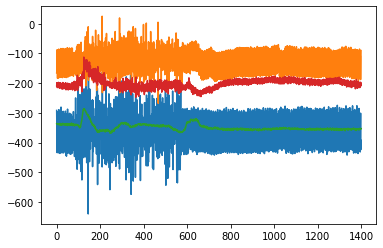

In [4]:
data = np.load('datasets/emg_data_psd_2019-2/2_EMG_Claudia_25-11-2019_202532.npy')
data = np.transpose(data, (0, 2, 1))
print(data.shape)
for i in range(data.shape[1]):
    plt.plot(data[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "notch"

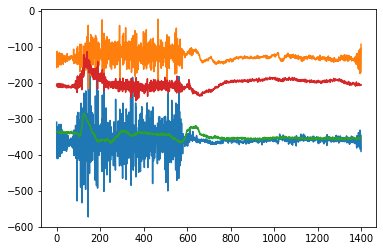

In [5]:
data_filtered = butter_notch(data, 60)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "bandpass"

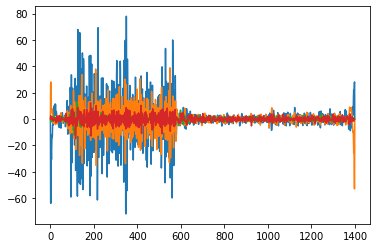

In [6]:
data_filtered = butter_bandpass(data_filtered, 5, 50)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "notch", seguido por "lowpass" e "highpass"

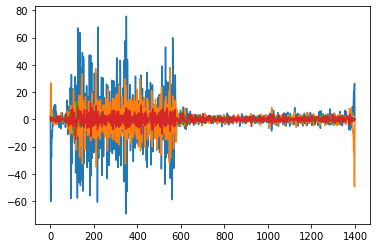

In [7]:
data_filtered = butter_notch(data, 60)
data_filtered = butter_highpass(data_filtered, 5)
data_filtered = butter_lowpass(data_filtered, 50)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "notch", seguido por "lowpass" e "highpass" 10 vezes

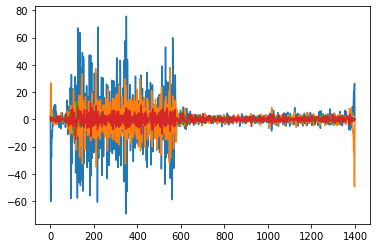

In [8]:
data_filtered = data
for _ in range(10):
    data_filtered = butter_notch(data, 60)
    data_filtered = butter_highpass(data_filtered, 5)
    data_filtered = butter_lowpass(data_filtered, 50)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Mesmos dados acima com eletrodos em gráficos separados

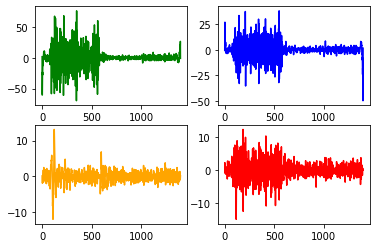

In [9]:
fig, axes = plt.subplots(2, 2)
colors = ('green', 'blue', 'orange', 'red')
for i, ax in enumerate(axes.flatten()):
    ax.plot(data_filtered[3,i,:], color=colors[i])